# Sistem Rekomendasi Movie

In [ ]:
# Import library
import pandas as pd
%matplotlib inline

In [ ]:
# Menghubungkan google drive ke google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Understanding

Pertama-tama, mari kita unzip dataset yang akan digunakan.

In [ ]:
!unzip /content/drive/MyDrive/movies_dataset.zip

Archive:  /content/drive/MyDrive/movies_dataset.zip
replace movies.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ratings.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


Setelah melakukan unzip terhadap dataset, saatnya membaca dataset menggunakan library pandas.

In [ ]:
# Memuat dataset
# src https://www.kaggle.com/datasets/parasharmanas/movie-recommendation-system
movies = pd.read_csv('/content/movies.csv')
ratings = pd.read_csv('/content/ratings.csv')

print('Banyak data movies: ', movies.shape[0])
print('Banyak data ratings: ', ratings.shape[0])

Banyak data movies:  62423
Banyak data ratings:  25000095


Selanjutnya, mari kita melihat isi dari dataset movies dan ratings menggunakan fungsi head().

In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


Variabel-variabel pada dataset proyek ini adalah sebagai berikut:
* movies: merupakan movie yang tersedia.
* ratings: merupakan penilaian seorang user terhadap sebuah movie.

## Univariate Exploratory Data Analysis

Mari kita eksplorasi variabel yang ada pada kedua dataset.

### Variabel Movies

Pertama, kita akan melakukan eksplorasi terhadap variabel movies. Mari kita gunakan kode berikut untuk melihat 5 baris data awal dan 5 baris data akhir.

In [ ]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


Dari tabel di atas dapat diketahui bahwa data movies terdiri dari 3 kolom, yaitu:
* movieId: merupakan identitas movie.
* title: merupakan judul movie sekaligus tahun keluar.
* genres: merupakan genre dari tiap movie.

Dan ternyata ada data yang tidak memiliki genre seperti movie "A Girl Thing (2001)" di atas.

Mari kita lihat seberapa banyak data yang tidak memiliki genre dengan kode berikut.

In [ ]:
# Melihat jumlah data movie yang tidak memiliki genre
print(f"Jumlah data movie tanpa genre adalah: {movies[movies['genres'] == '(no genres listed)'].shape[0]} dari {movies.shape[0]} data")

Jumlah data movie tanpa genre adalah: 5062 dari 62423 data


Berdasarkan output di atas, kita dapat melakukan beberapa perubahan terhadap data variabel movies, seperti:
* Memisahkan tiap genre dari tiap movie agar genre dapat memiliki struktur yang lebih baik dalam dataset.
* Melakukan perubahan pada movie yang tidak memiliki genre spesifik.

### Variabel Ratings

Setelah selesai dengan variabel movies, mari kita lanjutkan dengan variabel ratings

In [ ]:
ratings

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
25000090,162541,50872,4.5,1240953372
25000091,162541,55768,2.5,1240951998
25000092,162541,56176,2.0,1240950697
25000093,162541,58559,4.0,1240953434


Dari tabel di atas dapat diketahui bahwa data movies terdiri dari 4 kolom, yaitu:
* userId: merupakan identitas pengguna yang memberikan penilaian.
* movieId: merupakan identitas movie yang diberi penilaian.
* rating: merupakan penilaian yang diberikan.
* timestamp: merupakan kapan penilaian diberikan oleh pengguna.

In [ ]:
# Membuat nilai hanya 2 angka di belakang koma
pd.options.display.float_format = '{:.2f}'.format
ratings.describe()

,userId,movieId,rating,timestamp
count,25000095.00,25000095.00,25000095.00,25000095.00
mean,81189.28,21387.98,3.53,1215601443.12
std,46791.72,39198.86,1.06,226875808.06
min,1.00,1.00,0.50,789652009.00
25%,40510.00,1196.00,3.00,1011747245.00
50%,80914.00,2947.00,3.50,1198868375.00
75%,121557.00,8623.00,4.00,1447205341.50
max,162541.00,209171.00,5.00,1574327703.00


Dari output di atas, dapat diketahui bahwa penilaian paling rendah pada dataset ini adalah 0,5 dan paling tinggi adalah 5,0.

Sekarang, mari kita lihat berapa pengguna yang memberikan penilaian dan berapa movie yang diberikan penilaian dengan kode berikut.

In [ ]:
print('Jumlah userId: ', len(ratings.userId.unique()))
print('Jumlah movieId: ', len(ratings.movieId.unique()))

Jumlah userId:  162541
Jumlah movieId:  59047


## Data Preprocessing

### Menggabungkan Data Movies Dengan Ratings

Agar sistem rekomendasi dapat berjalan dengan baik, mari kita gabungkan kedua dataset yang dimiliki. Dengan ini, nantinya model dapat memberikan rekomendasi yang sesuai kepada pengguna. Mari kita gabungkan data movies dengan ratings dengan kode berikut.

In [ ]:
# Menggabungkan data ratings dengan movies berdasarkan movieId
rated_movies = pd.merge(movies, ratings, on='movieId', how='left')

rated_movies

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.00,3.50,1141415820.00
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.00,4.00,1439472215.00
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.00,3.00,1573944252.00
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.00,4.00,858625949.00
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8.00,4.00,890492517.00
...,...,...,...,...,...,...
25003466,209157,We (2018),Drama,119571.00,1.50,1574280748.00
25003467,209159,Window of the Soul (2001),Documentary,115835.00,3.00,1574280985.00
25003468,209163,Bad Poems (2018),Comedy|Drama,6964.00,4.50,1574284913.00
25003469,209169,A Girl Thing (2001),(no genres listed),119571.00,3.00,1574291826.00


## Data Preparation

### Mengatasi Missing Value Dan Movie Yang Tidak Memiliki Genre

Setelah proses penggabungan, mari kita cek lagi datanya apakah ada missing value atau tidak dengan kode berikut.

In [ ]:
# Mengecek missing value pada dataframe rated_movies
rated_movies.isnull().sum()

,0
movieId,0
title,0
genres,0
userId,3376
rating,3376
timestamp,3376


Ternyata ada 3376 missing value pada userId, rating dan timestamp. Namun, karena kita memiliki data yang sangat banyak, tidak apa-apa jika data yang memiliki missing value kita drop. Oleh karena itu, mari kita drop dengan kode berikut.

In [ ]:
# Menghilangkan data berisi missing value dengan fungsi dropna()
rated_movies = rated_movies.dropna()

# Mengubah tipe data userId dari float menjadi integer
rated_movies['userId'] = rated_movies['userId'].astype('int')
rated_movies

<ipython-input-14-621eec3b8d51>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rated_movies['userId'] = rated_movies['userId'].astype('int')


,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,3.50,1141415820.00
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.00,1439472215.00
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,3.00,1573944252.00
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.00,858625949.00
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.00,890492517.00
...,...,...,...,...,...,...
25003466,209157,We (2018),Drama,119571,1.50,1574280748.00
25003467,209159,Window of the Soul (2001),Documentary,115835,3.00,1574280985.00
25003468,209163,Bad Poems (2018),Comedy|Drama,6964,4.50,1574284913.00
25003469,209169,A Girl Thing (2001),(no genres listed),119571,3.00,1574291826.00


Mari kita cek ulang untuk memastikan tidak ada lagi missing value pada dataset kita.

In [ ]:
# Mengecek kembali missing value pada dataframe rated_movies
rated_movies.isnull().sum()

,0
movieId,0
title,0
genres,0
userId,0
rating,0
timestamp,0


Setelah selesai dengan missing value, selanjutnya mari kita atasi masalah movie yang tidak memiliki genre. Mari kita lihat ulang berapa movie yang tidak memiliki genre dengan kode berikut.

In [ ]:
# Melihat jumlah data movie yang tidak memiliki genre
print(f"Jumlah data movie tanpa genre adalah: {rated_movies[rated_movies['genres'] == '(no genres listed)'].shape[0]} dari {rated_movies.shape[0]} data")

Jumlah data movie tanpa genre adalah: 26627 dari 25000095 data


Karena data kita masih dapat dibilang terlampau banyak dan genre sebuah movie itu tidak dapat diisi asal-asalan, maka lebih baik kita hapus data movie yang tidak memiliki genre. Kita akan menghapusnya dengan kode sederhana berikut.

In [ ]:
# Menghilangkan data yang bergenre "(no genre listed)"
clean_movies_df = rated_movies[rated_movies['genres'] != '(no genres listed)']

Setelah berhasil dihilangkan, mari kita pastikan sekali lagi bahwa tidak ada lagi data yang bergenre "(no genre listed)".

In [ ]:
# Melihat jumlah data movie yang tidak memiliki genre
print(f"Jumlah data movie tanpa genre adalah: {clean_movies_df[clean_movies_df['genres'] == '(no genres listed)'].shape[0]} dari {clean_movies_df.shape[0]} data")

Jumlah data movie tanpa genre adalah: 0 dari 24973468 data


Setelah penghapusan data yang tidak memiliki genre, ternyata data kita masih banyak yaitu, 24.973.456 data. Data ini terlalu banyak untuk sebuah sistem rekomendasi sederhana. Maka dari itu mari kita hapus 99,9% data dari seluruh dataset.

In [ ]:
# Menghapus 99,9% baris data secara acak
clean_movies_df = clean_movies_df.drop(clean_movies_df.sample(frac=0.999, random_state=42).index).reset_index(drop=True)

In [ ]:
clean_movies_df

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,127,5.00,1433013979.00
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2363,4.50,1545391791.00
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2662,4.50,1508558784.00
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,9165,3.00,860438406.00
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11689,5.00,850472842.00
...,...,...,...,...,...,...
24968,205383,El Camino: A Breaking Bad Movie (2019),Crime|Drama|Thriller,34072,3.00,1570949173.00
24969,205425,Dave Chappelle: Sticks & Stones (2019),Comedy,147952,5.00,1567393790.00
24970,206291,7 Reasons to Run Away (from Society) (2019),Comedy|Horror,53837,1.00,1568706290.00
24971,207199,Along Came the Devil 2,Horror|Thriller,130528,0.50,1570888863.00


Selanjutnya, kita hanya akan menggunakan data yang unik untuk diberikan pada model. Oleh karena itu, mari hapus data yang duplikat berdasarkan id movie.

In [ ]:
# Membuang data duplikat berdasarkan movieId
preparation_df = clean_movies_df
preparation_df = preparation_df.drop_duplicates('movieId')
preparation_df

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,127,5.00,1433013979.00
54,2,Jumanji (1995),Adventure|Children|Fantasy,5097,5.00,853466656.00
79,3,Grumpier Old Men (1995),Comedy|Romance,28466,3.00,851531704.00
88,4,Waiting to Exhale (1995),Comedy|Drama|Romance,4282,4.00,945964370.00
91,5,Father of the Bride Part II (1995),Comedy,54576,2.00,942158474.00
...,...,...,...,...,...,...
24968,205383,El Camino: A Breaking Bad Movie (2019),Crime|Drama|Thriller,34072,3.00,1570949173.00
24969,205425,Dave Chappelle: Sticks & Stones (2019),Comedy,147952,5.00,1567393790.00
24970,206291,7 Reasons to Run Away (from Society) (2019),Comedy|Horror,53837,1.00,1568706290.00
24971,207199,Along Came the Devil 2,Horror|Thriller,130528,0.50,1570888863.00


Selanjutnya, kita kan mengkonversi data series menjadi list.

In [ ]:
# Mengonversi data series movieId menjadi dalam bentuk list
movie_id = preparation_df['movieId'].tolist()

# Mengonversi data series title menjadi dalam bentuk list
movie_title = preparation_df['title'].tolist()

# Mengonversi data series genre menjadi dalam bentuk list
movie_genre = preparation_df['genres'].tolist()

print(len(movie_id))
print(len(movie_title))
print(len(movie_genre))

5651
5651
5651


Tahap selanjutnya, kita akan membuat dictionary pasangan key-value pada movie_id, movie_name dan movie_genre.

In [ ]:
# Membuat dictionary untuk data 'movie_id', 'movie_title', 'movie_genre'
movie_new = pd.DataFrame({
    'id': movie_id,
    'title': movie_title,
    'genre': movie_genre
})

movie_new

,id,title,genre
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
5646,205383,El Camino: A Breaking Bad Movie (2019),Crime|Drama|Thriller
5647,205425,Dave Chappelle: Sticks & Stones (2019),Comedy
5648,206291,7 Reasons to Run Away (from Society) (2019),Comedy|Horror
5649,207199,Along Came the Devil 2,Horror|Thriller


## Model Development dengan Content Based Filtering

Setelah selesai melakukan tahap preprocessing dan preparation, selanjutnya kita akan melakukan tahap model development. Mari kita mulai dari memindahkan data ke variabel baru.

In [ ]:
data = movie_new
data.sample(5)

,id,title,genre
2062,3695,Toxic Avenger Part III: The Last Temptation of...,Comedy|Horror
1394,2391,"Simple Plan, A (1998)",Crime|Drama|Thriller
4290,67695,Observe and Report (2009),Action|Comedy
3090,6871,Good Boy! (2003),Children|Comedy|Sci-Fi
5147,122892,Avengers: Age of Ultron (2015),Action|Adventure|Sci-Fi


### One-Hot Encoding

Pada tahap ini, kita akan membangun sistem rekomendasi berdasarkan genre movie. Pada proyek ini kita akan menggunakan teknik One-Hot Encoding terhadap data genre yang dimiliki.

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

# Mengubah kolom genre dari string menjadi list
data['genres_list'] = data['genre'].apply(lambda x: x.split('|'))

# Inisialisasi dan lakukan one-hot encoding pada genre
mlb = MultiLabelBinarizer()
genre_onehot = mlb.fit_transform(data['genres_list'])

# Buat DataFrame genre dari hasil one-hot encoding
genre_onehot_df = pd.DataFrame(genre_onehot, columns=mlb.classes_, index=data.index)

# Gabungkan dengan data awal
df_final = pd.concat([data[['id', 'title']], genre_onehot_df], axis=1)

In [ ]:
df_final.head()

,id,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Cosine Similarity

Setelah mengubah data genre menjadi bentuk One-Hot Encoding, sekarang kita akan menghitung derajat kesamaan antar movie dengan teknik Cosine Similarity.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity genre pada data movie
cosine_sim = cosine_similarity(genre_onehot)
cosine_sim

array([[1.        , 0.77459667, 0.31622777, ..., 0.31622777, 0.        ,
        0.        ],
       [0.77459667, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.31622777, 0.        , 1.        , ..., 0.5       , 0.        ,
        0.5       ],
       ...,
       [0.31622777, 0.        , 0.5       , ..., 1.        , 0.5       ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.5       , 1.        ,
        0.        ],
       [0.        , 0.        , 0.5       , ..., 0.        , 0.        ,
        1.        ]])

Selanjutnya, mari kita lihat nilai kesamaan setiap movie dengan menampilkan title movie dalam 5 sampel kolom (axis = 1) dan 10 sampel baris (axis=0). Jalankan kode berikut.

In [ ]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa title movie
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['title'], columns=data['title'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap movie
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (5651, 5651)


title,Better Than Chocolate (1999),If Lucy Fell (1996),"Christmas Tale, A (Un conte de Noël) (2008)",The Hunger Games (2012),Star Trek VI: The Undiscovered Country (1991)
title,,,,,
"Union: The Business Behind Getting High, The (2007)",0.50,0.50,0.50,0.00,0.00
Dead Heat (1988),0.35,0.35,0.35,0.45,0.58
Monty Python's The Meaning of Life (1983),0.71,0.71,0.71,0.00,0.00
P2 (2007),0.00,0.00,0.00,0.32,0.00
Warrior (2011),0.00,0.00,0.71,0.45,0.00
Traitor (2008),0.00,0.00,0.41,0.52,0.00
Donnie Darko (2001),0.00,0.00,0.35,0.67,0.58
Black Hawk Down (2001),0.00,0.00,0.41,0.52,0.33
"Jerk, The (1979)",0.71,0.71,0.71,0.00,0.00


Dengan cosine similarity, kita berhasil mengidentifikasi kesamaan antara satu movie dengan movie lainnya.

### Mendapatkan Rekomendasi

Pada tahap ini kita akan mendapatkan rekomendasi berdasarkan kesamaan yang telah dihitung pada tahap sebelumnya. Kita akan membuat fungsi movie_recommendations dengan beberapa parameter berikut.
* movie_title : Nama movie (index kemiripan dataframe).
* Similarity_data : Dataframe mengenai similarity yang telah kita definisikan sebelumnya.
* Items : Nama dan fitur yang digunakan untuk mendefinisikan kemiripan, dalam hal ini adalah ‘movie_title’ dan ‘genre’.
* k : Banyak rekomendasi yang ingin diberikan.

In [ ]:
def movie_recommendations(movie_title, similarity_data=cosine_sim_df, items=data[['title', 'genre']], k=5):
    """
    Rekomendasi Movie berdasarkan kemiripan dataframe

    Parameter:
    ---
    movie_title : tipe data string (str)
                Nama movie (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan movie sebagai
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---


    Pada index ini, kita mengambil k dengan nilai similarity terbesar
    pada index matrix yang diberikan (i).
    """


    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,movie_title].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop movie_title agar nama movie yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(movie_title, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

Selanjutnya, mari kita terapkan kode di atas untuk menemukan rekomendasi movie yang mirip dengan Lights Out (2016). Terapkan kode berikut:

In [ ]:
data[data.title.eq('Lights Out (2016)')]

,id,title,genre,genres_list
5401,160571,Lights Out (2016),Horror,[Horror]


Lights Out (2016) masuk dalam genre horror. Tentu kita berharap rekomendasi yang diberikan adalah movie dengan kategori yang mirip. Sekarang, dapatkan rekomendasi movie dengan memanggil fungsi yang telah kita definisikan sebelumnya:

In [ ]:
movie_recommendations('Lights Out (2016)')

,title,genre
0,Pet Sematary (1989),Horror
1,"Mangler, The (1995)",Horror
2,Amityville 3-D (1983),Horror
3,Amityville II: The Possession (1982),Horror
4,Jeepers Creepers (2001),Horror


## Model Development Dengan Collaborative Filtering

Setelah menyelesaikan Model Content Based Filtering, selanjutnya kita akan mengembangkan Model untuk Collaborative Filtering. Berbeda dari teknik sebelumnya yang menggunakan genre, teknik kali ini akan menggunakan rating.

### Data Understanding

Mari kita import library tambahan yang diperlukan untuk pengembangan ini.

In [ ]:
# Import library
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

Mari kita pindahkan data dari variabel ratings ke df agar memudahkan proses pengembangan.

In [ ]:
df = ratings
df

,userId,movieId,rating,timestamp
0,1,296,5.00,1147880044
1,1,306,3.50,1147868817
2,1,307,5.00,1147868828
3,1,665,5.00,1147878820
4,1,899,3.50,1147868510
...,...,...,...,...
25000090,162541,50872,4.50,1240953372
25000091,162541,55768,2.50,1240951998
25000092,162541,56176,2.00,1240950697
25000093,162541,58559,4.00,1240953434


Dapat dilihat bahwa data yang kita miliki ada sebanyak 25.000.095 data. Seperti yang telah dilakukan pada tahap-tahap sebelumnya, data ini terlalu banyak untuk sebuah sistem rekomendasi sederhana. Maka dari itu mari kita hapus 99,9% data dari seluruh dataset.

In [ ]:
# Menghapus 99,9% baris data secara acak
df = df.drop(df.sample(frac=0.999, random_state=42).index).reset_index(drop=True)

Sekarang, mari lihat data yang tersisa.

In [ ]:
df

,userId,movieId,rating,timestamp
0,1,6016,5.00,1147869090
1,3,105213,3.00,1566091330
2,4,1036,4.00,1573941169
3,19,296,3.50,1466674637
4,23,2262,3.00,942969678
...,...,...,...,...
24995,162524,832,4.00,1072920481
24996,162527,3361,4.00,1301687784
24997,162532,3438,3.00,1378256822
24998,162534,103341,3.50,1526713052


Dapat dilihat, sekarang kita hanya memiliki 25.000 data yang tersisa.

### Data Preparation

Selanjutnya pada proses preparation ini, kita akan melakukan encoding pada fitur userId dan movieId menjadi indeks integer.

In [ ]:
# Mengubah userId menjadi list tanpa nilai yang sama
user_ids = df['userId'].unique().tolist()
print('list userId: ', user_ids)

# Melakukan encoding userId
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userId : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke userId
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userId: ', user_encoded_to_user)

list userId:  [1, 3, 4, 19, 23, 31, 46, 70, 148, 150, 159, 164, 174, 181, 187, 199, 201, 207, 213, 220, 226, 230, 265, 283, 288, 290, 292, 322, 325, 345, 354, 364, 368, 371, 396, 399, 400, 402, 405, 406, 407, 408, 423, 426, 450, 460, 463, 472, 485, 519, 523, 541, 548, 552, 559, 561, 567, 572, 587, 597, 606, 624, 628, 647, 671, 676, 685, 697, 701, 702, 707, 720, 727, 757, 780, 786, 803, 805, 842, 846, 847, 848, 850, 854, 858, 859, 860, 871, 875, 886, 894, 897, 901, 905, 919, 930, 935, 939, 951, 966, 967, 977, 979, 983, 984, 986, 997, 1004, 1011, 1013, 1016, 1024, 1038, 1041, 1042, 1060, 1062, 1067, 1078, 1105, 1118, 1121, 1134, 1137, 1150, 1155, 1171, 1173, 1180, 1198, 1221, 1232, 1237, 1239, 1242, 1246, 1255, 1259, 1273, 1277, 1281, 1288, 1299, 1334, 1336, 1342, 1353, 1355, 1367, 1386, 1397, 1400, 1401, 1402, 1409, 1427, 1442, 1447, 1453, 1474, 1477, 1480, 1488, 1495, 1498, 1499, 1526, 1527, 1533, 1574, 1581, 1585, 1591, 1599, 1604, 1606, 1610, 1611, 1613, 1619, 1628, 1639, 1644, 1645,

In [ ]:
# Mengubah movieId menjadi list tanpa nilai yang sama
movie_ids = df['movieId'].unique().tolist()

# Melakukan proses encoding movieId
movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}

# Melakukan proses encoding angka ke movieId
movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}

Selanjutnya, mapping userId dan movieId tadi ke dalam dataframe.

In [ ]:
# Mapping userId ke dataframe user
df['user'] = df['userId'].map(user_to_user_encoded)

# Mapping movieId ke dataframe resto
df['movie'] = df['movieId'].map(movie_to_movie_encoded)

Lakukan pengecekan terhadap jumlah pengguna, movie dan min dan max rating.

In [ ]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah movie
num_movie = len(movie_encoded_to_movie)
print(num_movie)

# Mengubah rating menjadi nilai float
df['rating'] = df['rating'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(df['rating'])

# Nilai maksimal rating
max_rating = max(df['rating'])

print('Number of User: {}, Number of Resto: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_movie, min_rating, max_rating
))

19937
5729
Number of User: 19937, Number of Resto: 5729, Min Rating: 0.5, Max Rating: 5.0


### Membagi Data untuk Training dan Validation

Sebelum melakukan pembagian dataset, sebaiknya acak data terlebih dahulu agar distribusi pembagian data menjadi random.

In [ ]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,userId,movieId,rating,timestamp,user,movie
6868,44215,117533,4.50,1533235245,5467,3019
24016,156003,1197,3.50,1134598749,19146,633
9668,62737,905,5.00,1203711799,7703,3128
13640,88492,329,4.00,832799065,10882,322
14018,91009,17,5.00,1337202463,11188,28
...,...,...,...,...,...,...
21575,140740,3081,3.00,1163788225,17239,2310
5390,34602,1918,3.00,996945559,4297,1403
860,5872,5816,4.50,1435364142,703,700
15795,102847,1690,3.00,965506671,12614,996


Selanjutnya, kita akan membagi data training menjadi 80% dan validation menjadi 20%. Jalankan kode berikut.

In [ ]:
# Membuat variabel x untuk mencocokkan data user dan movie menjadi satu value
x = df[['user', 'movie']].values

# Membuat variabel y untuk membuat rating dari hasil
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 5467  3019]
 [19146   633]
 [ 7703  3128]
 ...
 [  703   700]
 [12614   996]
 [18848  1476]] [0.88888889 0.66666667 1.         ... 0.88888889 0.55555556 0.77777778]


## Proses Training

Sebelum memulai proses training, mari definisikan class model yang akan kita gunakan nantinya. Pada proyek ini, kita akan menggunakan RecommenderNet dari Keras Model Class.

In [ ]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_movie, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_movie = num_movie
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.movie_embedding = layers.Embedding( # layer embeddings movie
        num_movie,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.movie_bias = layers.Embedding(num_movie, 1) # layer embedding movie bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    movie_vector = self.movie_embedding(inputs[:, 1]) # memanggil layer embedding 3
    movie_bias = self.movie_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)

    x = dot_user_movie + user_bias + movie_bias

    return tf.nn.sigmoid(x) # activation sigmoid

Selanjutnya, lakukan compile pada model yang telah didefinisikan.

In [ ]:
model = RecommenderNet(num_users, num_movie, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Model ini menggunakan Binary Crossentropy untuk menghitung loss function, Adam (Adaptive Moment Estimation) sebagai optimizer, dan root mean squared error (RMSE) sebagai metrics evaluation.

Langkah berikutnya, mulailah proses training.

In [ ]:
# Memulai training

history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 32,
    epochs = 20,
    validation_data = (x_val, y_val)
)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 69s 18ms/step - loss: 0.6913 - root_mean_squared_error: 0.2903 - val_loss: 0.6831 - val_root_mean_squared_error: 0.2838
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - loss: 0.6306 - root_mean_squared_error: 0.2349 - val_loss: 0.6800 - val_root_mean_squared_error: 0.2808
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - loss: 0.6221 - root_mean_squared_error: 0.2282 - val_loss: 0.6778 - val_root_mean_squared_error: 0.2788
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - loss: 0.6196 - root_mean_squared_error: 0.2251 - val_loss: 0.6750 - val_root_mean_squared_error: 0.2760
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - loss: 0.6177 - root_mean_squared_error: 0.2236 - val_loss: 0.6733 - val_root_mean_squared_error: 0.2744
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - loss: 0.6180 - root_mean_squared_error: 0.2213 - val_loss: 0.6696 - val_root_mean_squared_error: 0.2708
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 

### Visualisasi Metrik

Untuk melihat visualisasi proses training, mari kita plot metrik evaluasi dengan matplotlib dengan kode berikut.

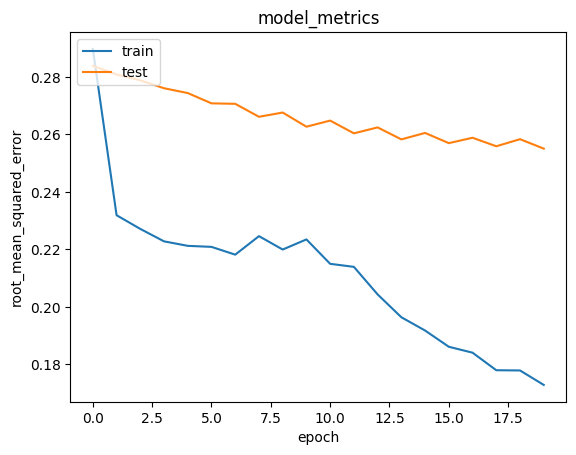

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Dari proses ini, kita memperoleh nilai error akhir sebesar sekitar 0.17 dan error pada data validasi sebesar 0.25. Nilai tersebut cukup bagus untuk sistem rekomendasi. Mari kita cek, apakah model ini bisa membuat rekomendasi dengan baik.

### Mendapatkan Rekomendasi Movie

Untuk mendapatkan rekomendasi movie, pertama kita ambil sampel user secara acak dan definisikan variabel movie_not_watched yang merupakan daftar movie yang belum pernah ditonton oleh pengguna. Sebelumnya, pengguna telah memberi rating pada beberapa movie yang telah mereka tonton. Kita menggunakan rating ini untuk membuat rekomendasi movie yang mungkin cocok untuk pengguna.

Mari kita mulai dengan mengambil sampel pengguna.

In [ ]:
movie_df = movie_new

# Mengambil sample user
user_id = df.userId.sample(1).iloc[0]
movie_watched_by_user = df[df.userId == user_id]

# Operator bitwise (~)
movie_not_watched = movie_df[~movie_df['id'].isin(movie_watched_by_user.movieId.values)]['id']
movie_not_watched = list(
    set(movie_not_watched)
    .intersection(set(movie_to_movie_encoded.keys()))
)

movie_not_watched = [[movie_to_movie_encoded.get(x)] for x in movie_not_watched]
user_encoder = user_to_user_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movie_not_watched), movie_not_watched)
)

Selanjutnya, gunakan fungsi predict() untuk memperoleh rekomendasi movie.

In [ ]:
ratings = model.predict(user_movie_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movie_to_movie_encoded.get(movie_not_watched[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Movie with high ratings from user')
print('----' * 8)

top_movie_user = (
    movie_watched_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .movieId.values
)

movie_df_rows = movie_df[movie_df['id'].isin(top_movie_user)]
for row in movie_df_rows.itertuples():
    print(row.title, ':', row.genre)

print('----' * 8)
print('Top movies recommendation')
print('----' * 8)

recommended_movie = movie_df[movie_df['id'].isin(recommended_movie_ids)]
for row in recommended_movie.itertuples():
    print(row.title, ':', row.genre)

117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Showing recommendations for users: 87157
Movie with high ratings from user
--------------------------------
Crazy Rich Asians (2018) : Comedy
--------------------------------
Top movies recommendation
--------------------------------
Nine Months (1995) : Comedy|Romance
Death and the Maiden (1994) : Drama|Thriller
Gremlins 2: The New Batch (1990) : Comedy|Horror
Christmas Vacation (National Lampoon's Christmas Vacation) (1989) : Comedy


Dari hal yang diperoleh di atas, beberapa rekomendasi movie berupa movie yang bergenre Comedy dan Romance, Drama dan Thriller, Comedy dan Horror, serta hanya Comedy.